<a href="https://colab.research.google.com/github/safira123-pixel/PCVK_Genap_2023/blob/main/UAS_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 06

 1. Safira Istifarini ( 2041720229 | 17 )<br>
 2. Hafizh Izhar Darmansyah ( 2041720078 | 11 )

PENDETEKSI TEPI CITRA KANKER KULIT MENGGUNAKAN METODE LAPLACIAN OF GAUSSIAN

In [25]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
#import required library
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from google.colab.patches import cv2_imshow
%matplotlib inline

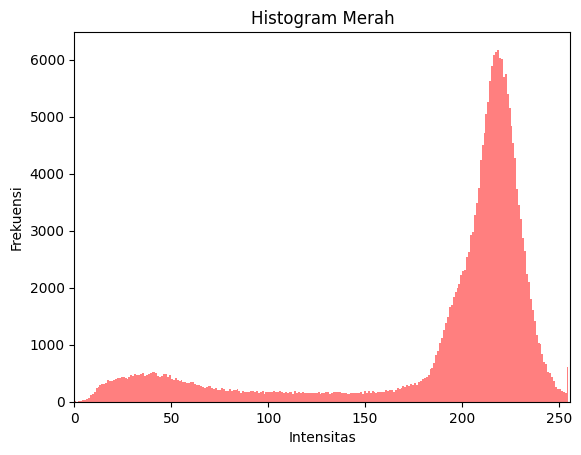

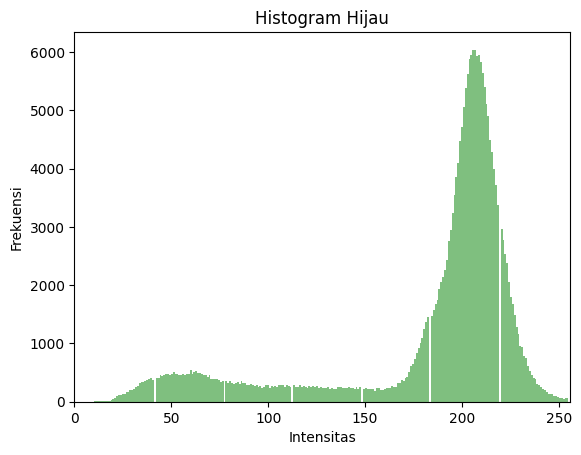

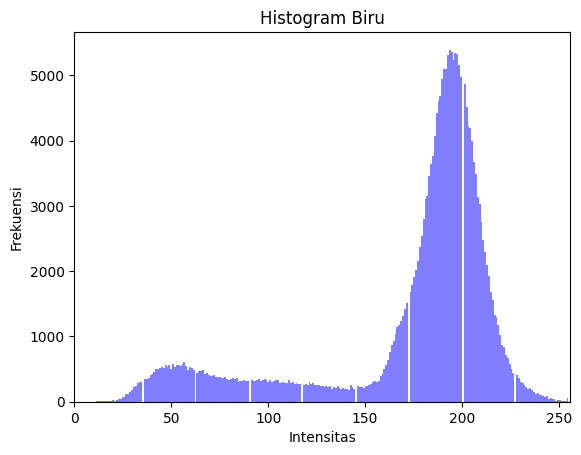

In [27]:
x1 = cv2.imread('/content/drive/MyDrive/PCVK/melanoma/dermIS/NM2_orig.jpg')
x1 = cv2.cvtColor(x1, cv2.COLOR_BGR2RGB)

red = x1[:,:,0]
green = x1[:,:,1]
blue = x1[:,:,2]

# Histogram untuk kanal merah
plt.figure()
plt.hist(red.ravel(), bins=256, color='red', alpha=0.5)
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')
plt.title('Histogram Merah')
plt.xlim([0, 256])

# Histogram untuk kanal hijau
plt.figure()
plt.hist(green.ravel(), bins=256, color='green', alpha=0.5)
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')
plt.title('Histogram Hijau')
plt.xlim([0, 256])

# Histogram untuk kanal biru
plt.figure()
plt.hist(blue.ravel(), bins=256, color='blue', alpha=0.5)
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')
plt.title('Histogram Biru')
plt.xlim([0, 256])

plt.show()

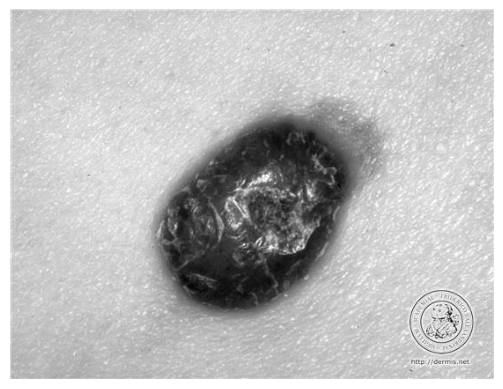

In [31]:
# Membaca citra
x1 = cv2.imread('/content/drive/MyDrive/PCVK/melanoma/dermIS/NM2_orig.jpg')

# Mengubah citra menjadi grayscale
I1 = cv2.cvtColor(x1, cv2.COLOR_BGR2GRAY)

# Menampilkan citra grayscale
plt.imshow(I1, cmap='gray')
plt.axis('off')
plt.show()

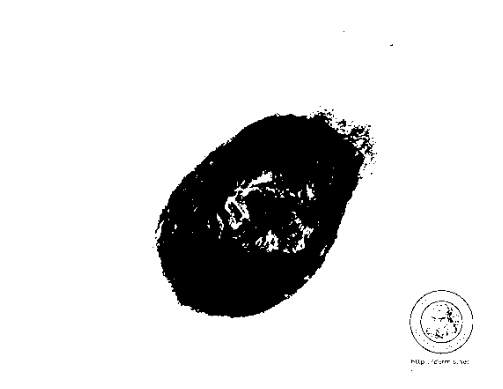

In [32]:
# Membaca citra
x1 = cv2.imread('/content/drive/MyDrive/PCVK/melanoma/dermIS/NM2_orig.jpg')

# Mengubah citra menjadi grayscale
I1 = cv2.cvtColor(x1, cv2.COLOR_BGR2GRAY)

# Menggunakan metode Otsu untuk menentukan ambang batas
_, b1 = cv2.threshold(I1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Menampilkan citra biner
plt.figure()
plt.imshow(b1, cmap='gray')
plt.axis('off')
plt.show()

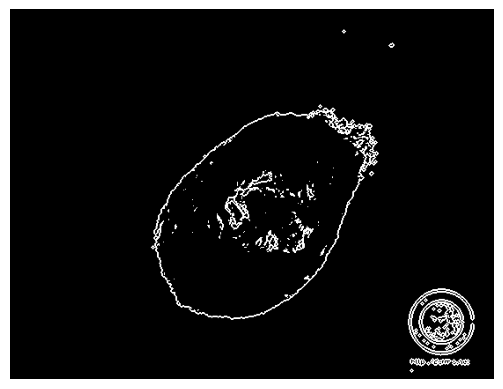

In [33]:
# Membaca citra
x1 = cv2.imread('/content/drive/MyDrive/PCVK/melanoma/dermIS/NM2_orig.jpg')
I1 = cv2.cvtColor(x1, cv2.COLOR_BGR2GRAY)

# Menggunakan metode Otsu untuk menentukan ambang batas
_, t = cv2.threshold(I1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Matriks kernel LoG
M = np.array([[0, 0, -1, 0, 0],
              [0, -1, -2, -1, 0],
              [-1, -2, 16, -2, -1],
              [0, -1, -2, -1, 0],
              [0, 0, -1, 0, 0]], dtype=np.float32)

# Melakukan konvolusi LoG
LoG = cv2.filter2D(b1, -1, M)

# Menampilkan citra hasil
plt.imshow(LoG, cmap='gray')
plt.axis('off')
plt.show()
